In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:

import dagshub
dagshub.init(repo_owner='mukeshjangid7877', repo_name='zomato-delivery-time-prediction', mlflow=True)


Accessing as mukeshjangid7877

Initialized MLflow to track repo "mukeshjangid7877/zomato-delivery-time-prediction"

Repository mukeshjangid7877/zomato-delivery-time-prediction initialized!

In [3]:
import mlflow

In [4]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow")

In [5]:
# mlflow experiment

mlflow.set_experiment("Exp 3 - RF HP Tuning")

2025/02/13 19:48:18 INFO mlflow.tracking.fluent: Experiment with name 'Exp 3 - RF HP Tuning' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/493c46fe1fea481480889fbd5224f737', creation_time=1739456298313, experiment_id='4', last_update_time=1739456298313, lifecycle_stage='active', name='Exp 3 - RF HP Tuning', tags={}>

In [6]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load the Data

In [7]:
# load the data

df = pd.read_csv('cleaned_data.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,time_taken (min),city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,Fog,jam,...,46,DEH,2,12,friday,0,15.0,21.0,night,10.28
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,high,...,23,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.24
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,Sandstorms,medium,...,21,PUNE,3,4,sunday,1,10.0,17.0,evening,13.79
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,low,...,20,LUDH,13,2,sunday,1,10.0,9.0,morning,2.93
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,jam,...,41,KNP,14,2,monday,0,15.0,19.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.49
45489,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45490,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,Cloudy,low,...,16,CHEN,3,11,thursday,0,NaN,23.0,night,4.66
45491,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,Cloudy,high,...,26,COIMB,3,7,sunday,1,5.0,13.0,afternoon,6.23


# Clean Data

In [8]:


df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,time_taken (min),city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,Fog,jam,...,46,DEH,2,12,friday,0,15.0,21.0,night,10.28
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,high,...,23,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.24
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,Sandstorms,medium,...,21,PUNE,3,4,sunday,1,10.0,17.0,evening,13.79
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,low,...,20,LUDH,13,2,sunday,1,10.0,9.0,morning,2.93
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,jam,...,41,KNP,14,2,monday,0,15.0,19.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.49
45489,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45490,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,Cloudy,low,...,16,CHEN,3,11,thursday,0,NaN,23.0,night,4.66
45491,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,Cloudy,high,...,26,COIMB,3,7,sunday,1,5.0,13.0,afternoon,6.23


In [9]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken (min)', 'city_name', 'order_day',
       'order_month', 'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [10]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min),is_weekend,pickup_time_minutes,order_time_of_day,distance
0,36.0,4.2,Fog,jam,2,snack,motorcycle,3.0,no,metropolitian,46,0,15.0,night,10.28
1,21.0,4.7,Stormy,high,1,meal,motorcycle,1.0,no,metropolitian,23,1,10.0,afternoon,6.24
2,23.0,4.7,Sandstorms,medium,1,drinks,scooter,1.0,no,metropolitian,21,1,10.0,evening,13.79
3,34.0,4.3,Sandstorms,low,0,buffet,motorcycle,0.0,no,metropolitian,20,1,10.0,morning,2.93
4,24.0,4.7,Fog,jam,1,snack,scooter,1.0,no,metropolitian,41,0,15.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.49
45489,21.0,4.6,Windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN
45490,30.0,4.9,Cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,NaN,night,4.66
45491,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,1,5.0,afternoon,6.23


In [11]:
# check for missing values

df.isna().sum()

age                     1854
ratings                 1908
weather_conditions       525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken (min)           0
is_weekend                 0
pickup_time_minutes    10086
order_time_of_day          0
distance                3630
dtype: int64

In [12]:
# check for duplicates

df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

<Axes: >

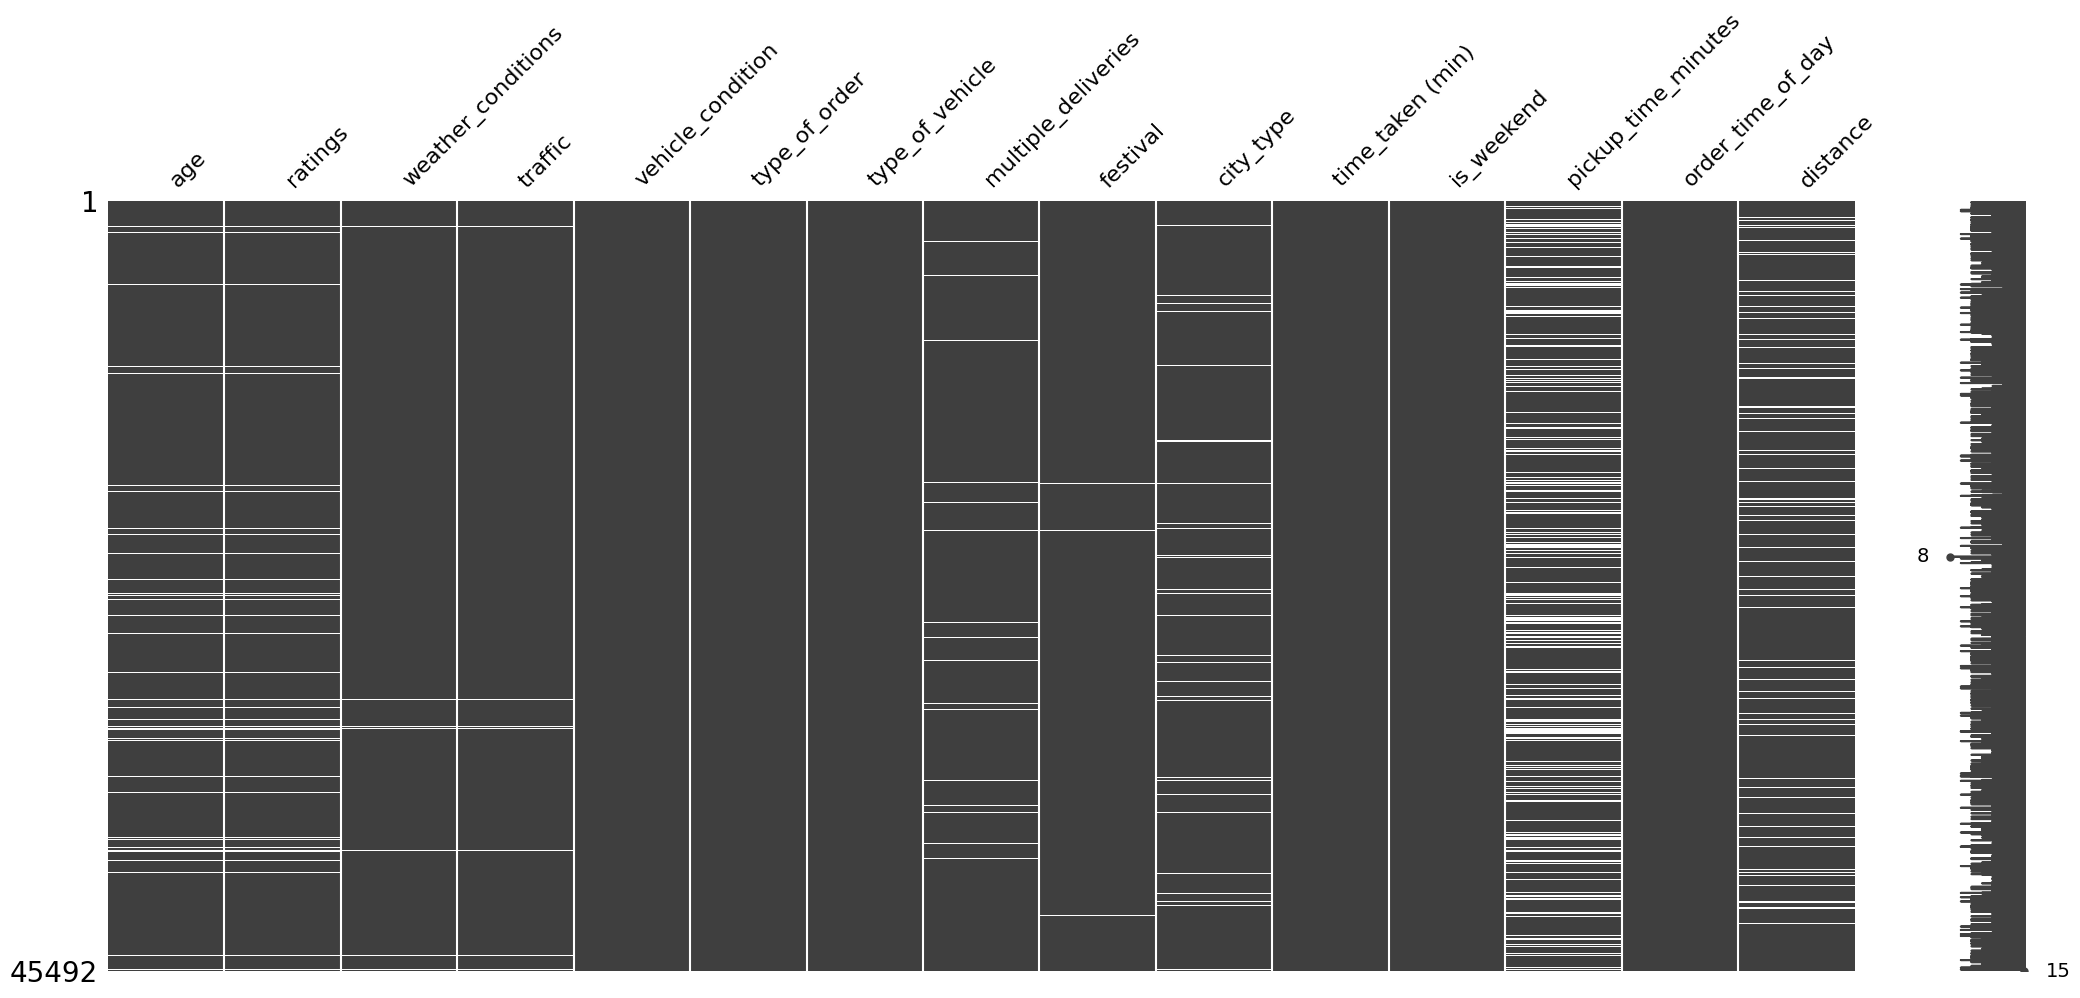

In [14]:
import missingno as msno

msno.matrix(df)

In [15]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'distance'],
      dtype='object')

# Drop Missing values

In [16]:
temp_df = df.copy().dropna()

In [17]:
# split into X and y

X = temp_df.drop(columns='time_taken (min)')
y = temp_df['time_taken (min)']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance
0,36.0,4.2,Fog,jam,2,snack,motorcycle,3.0,no,metropolitian,0,15.0,night,10.28
1,21.0,4.7,Stormy,high,1,meal,motorcycle,1.0,no,metropolitian,1,10.0,afternoon,6.24
2,23.0,4.7,Sandstorms,medium,1,drinks,scooter,1.0,no,metropolitian,1,10.0,evening,13.79
3,34.0,4.3,Sandstorms,low,0,buffet,motorcycle,0.0,no,metropolitian,1,10.0,morning,2.93
4,24.0,4.7,Fog,jam,1,snack,scooter,1.0,no,metropolitian,0,15.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45485,30.0,4.2,Cloudy,medium,1,snack,motorcycle,2.0,yes,metropolitian,0,15.0,evening,10.45
45487,35.0,4.2,Windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.60
45488,30.0,4.8,Windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.49
45491,20.0,4.7,Cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,1,5.0,afternoon,6.23


In [18]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (24603, 14)
The shape of test data is (6151, 14)


In [20]:
# missing values in train data

X_train.isna().sum()

age                    0
ratings                0
weather_conditions     0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
dtype: int64

In [21]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [22]:
missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'distance'],
      dtype='object')

In [23]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


0.0

# Pre-Processing Pipeline

In [24]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather_conditions',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic"]

In [25]:
nominal_cat_cols

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [26]:
X_train.isna().sum()

age                    0
ratings                0
weather_conditions     0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
dtype: int64

In [27]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather_conditions','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic"]

In [28]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

In [29]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['medium' 'high' 'jam' 'low']


In [30]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic'])],
                  verbose_feature_names_out=False)

In [31]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                # ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor)
                                # ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather_conditions',
                                                   'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic'])],
                                   verbose_feature_names_out=False))])

In [32]:
# do data preprocessing

X_train_trans = processing_pipeline.fit_transform(X_train)

X_test_trans = processing_pipeline.transform(X_test)

In [33]:
X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,type_of_order_drinks,...,festival_yes,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,vehicle_condition,multiple_deliveries
17762,0.315789,0.84,0.5,0.390769,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0
34688,0.000000,0.88,0.0,0.004103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2,1.0
28621,0.263158,0.84,1.0,0.777949,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0,2.0
19874,0.210526,0.84,1.0,0.482051,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2,0.0
14210,0.842105,0.92,0.5,0.470256,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44101,0.368421,0.96,0.0,0.163590,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0.0
7984,0.684211,0.96,1.0,0.468205,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.0
1289,0.684211,0.60,0.5,0.402051,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2,1.0
23284,0.736842,0.96,1.0,0.004103,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,1.0


In [34]:
from sklearn.ensemble import RandomForestRegressor
import optuna

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor

In [36]:
def objective(trial):
    with mlflow.start_run(nested=True):
        params = {
            "n_estimators": trial.suggest_int("n_estimators",10,500),
            "max_depth": trial.suggest_int("max_depth",1,30),
            "max_features": trial.suggest_categorical("max_features",[None,"sqrt","log2"]),
            "min_samples_split": trial.suggest_int("min_samples_split",2,10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf",1,10),
            "max_samples": trial.suggest_float("max_samples",0.5,1),
            "random_state": 42,
            "n_jobs": -1,
        }

        # log model parameters
        mlflow.log_params(params)

        # build the model
        rf = RandomForestRegressor(**params)
        model = TransformedTargetRegressor(regressor=rf,transformer=pt)

        # train the model
        model.fit(X_train_trans,y_train)

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)


        # perform cross validation
        cv_score = cross_val_score(model,
                                X_train_trans,
                                y_train,
                                cv=5,
                                scoring="neg_mean_absolute_error",
                                n_jobs=-1)

        # mean score
        mean_score = -(cv_score.mean())

        # log avg cross val error
        mlflow.log_metric("cross_val_error",mean_score)

        return mean_score

In [37]:
from sklearn.compose import TransformedTargetRegressor

In [38]:
# create optuna study
study = optuna.create_study(direction="minimize")

with mlflow.start_run(run_name="best_model"):
    # optimize the objective function
    study.optimize(objective,n_trials=20,n_jobs=-1,show_progress_bar=True)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

    # train the model on best parameters
    best_rf = RandomForestRegressor(**study.best_params)

    best_rf.fit(X_train_trans,y_train_pt.values.ravel())

    # get the predictions
    y_pred_train = best_rf.predict(X_train_trans)
    y_pred_test = best_rf.predict(X_test_trans)

    # get the actual predictions values
    y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
    y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))


    # perform cross validation
    model = TransformedTargetRegressor(regressor=best_rf,
                                        transformer=pt)


    scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",- scores.mean())

    # log the best model
    mlflow.sklearn.log_model(best_rf,artifact_path="model")

[I 2025-02-13 19:52:15,983] A new study created in memory with name: no-name-8417ddb6-f2ca-4e7f-9c44-3952e7af7e34


  0%|          | 0/20 [00:00<?, ?it/s]

🏃 View run bold-mole-171 at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4/runs/82aa99ee362c4e42b7a4e471107c7f12
🧪 View experiment at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4
[I 2025-02-13 19:52:33,617] Trial 0 finished with value: 3.471256932302841 and parameters: {'n_estimators': 60, 'max_depth': 14, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_samples': 0.9368937259551916}. Best is trial 0 with value: 3.471256932302841.
🏃 View run abundant-ray-683 at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4/runs/4ccff720331e4abc9e497a96862478eb
🧪 View experiment at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4
[I 2025-02-13 19:53:06,104] Trial 3 finished with value: 3.8020569106524293 and parameters: {'n_estimators': 449, 'max_depth': 9, 'max_features': 'log2', 'min_samples_s

2025/02/13 20:06:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run best_model at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4/runs/948e8324316f46d3bf254574631a35a7
🧪 View experiment at: https://dagshub.com/mukeshjangid7877/zomato-delivery-time-prediction.mlflow/#/experiments/4


In [39]:
study.best_params

{'n_estimators': 308,
 'max_depth': 23,
 'max_features': None,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_samples': 0.9987162950844053}

In [ ]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

In [ ]:
# plot hyperparameter importance plot

optuna.visualization.plot_param_importances(study)

In [ ]:
# slice plot

optuna.visualization.plot_slice(study)